In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [3]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
# Create the model
def create_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
        layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
    ])
    return model

In [6]:
# Define the custom loss function
def ppo_loss():
    def loss(y_true, y_pred):
        return -tf.reduce_mean(tf.reduce_sum(y_true * tf.math.log(y_pred + 1e-10), axis=1))
    return loss

In [7]:
# Training function
def train_model(model, x_train, y_train):
    history = model.compile(optimizer='adam', loss=ppo_loss(), metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
    return history

In [8]:
# Evaluate the model
def evaluate_model(model):
    results = model.evaluate(x_test, y_test)
    print(f"Test results - Loss: {results}")

In [9]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.show()

In [10]:
# Save the model
def save_model(model, filename):
    model.save(filename)
    print(f"Model saved to {filename}")


In [11]:
# Load the model
def load_model(filename):
    model = keras.models.load_model(filename, custom_objects={'loss': ppo_loss()})
    print(f"Model loaded from {filename}")
    return model

In [12]:
# Make predictions
def make_predictions(model, x_test):
    predictions = model.predict(x_test)
    return predictions

In [13]:
# Visualize predictions
def visualize_predictions(predictions, x_test, y_test, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}")
        plt.axis('off')
    plt.show()

Epoch 1/5


d:\anaconda\envs\myLLM\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8694 - loss: 0.4560 - val_accuracy: 0.9598 - val_loss: 0.1392
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9610 - loss: 0.1351 - val_accuracy: 0.9675 - val_loss: 0.1031
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9727 - loss: 0.0885 - val_accuracy: 0.9740 - val_loss: 0.0976
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9809 - loss: 0.0617 - val_accuracy: 0.9745 - val_loss: 0.0841
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9853 - loss: 0.0464 - val_accuracy: 0.9758 - val_loss: 0.0869
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.9730 - loss: 0.0927
Test results - Loss: [0.08183260262012482, 0.9753000140190125]


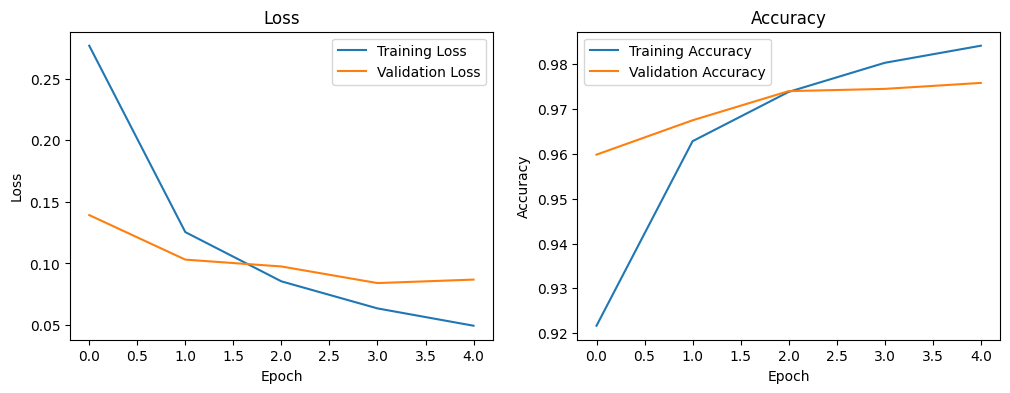

Model saved to ppo_mnist_model.h5
Model loaded from ppo_mnist_model.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step


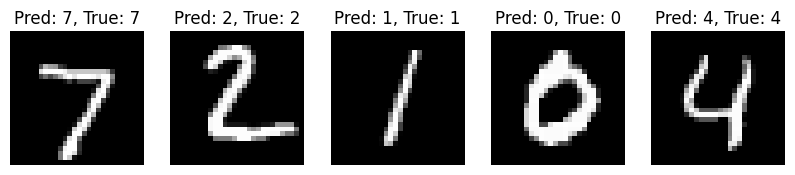

In [14]:
# Main execution
if __name__ == "__main__":
    model = create_model()
    history = train_model(model, x_train, y_train)
    evaluate_model(model)
    plot_history(history)

    # Save the model
    save_model_filename = "ppo_mnist_model.h5"
    save_model(model, save_model_filename)

    # Load the model
    loaded_model = load_model(save_model_filename)

    # Make predictions
    predictions = make_predictions(loaded_model, x_test)

    # Visualize predictions
    visualize_predictions(predictions, x_test, y_test)